# Customer Churn Prediction with ANN:
A bank is investigating a very high rate of customer leaving the bank. 
    Here is a 10,000 records dataset to investigate and predict which of the customers are more likely to leave the bank soon.

# data definintion:

RowNumber:serial number

CustomerId: Identity number for each customers

Surname:Name of the customer

CreditScore:A credit score is a number between 300–850 that depicts a consumer's creditworthiness. The higher the score, the better a borrower looks to potential lenders. A credit score is based on credit history: number of open accounts, total levels of debt, and repayment history, and other factors.

Geography:Tells us about the country the customer belongs to.

Gender: tell whether customer is MALE or FEMALE

Age: Tells the age of the customer.

Tenure: time taken 

Balance: Acccount Balance of the customer

NumOfProducts:

HasCrCard:tells whether the customers have credit card or not

IsActiveMember:tells us whether the customer is active or not

EstimatedSalary: salary per month

Exited: will the customer leave the bank or not 

In [1]:
## importing libraries required
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os

In [8]:
# read csv file using pandas
data = pd.read_csv ("Churn_Modelling.csv")

In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# 'shape' function gives the total number of rows and columns in the data
data.shape

(10000, 14)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [14]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


check for data types

In [12]:
# 'dtypes' gives the data type for each column
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Data Visualization


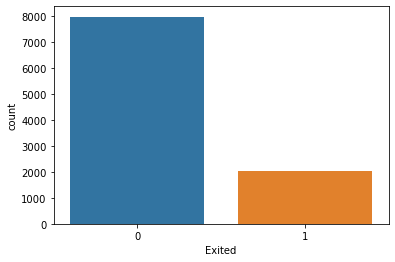

In [15]:
#count plot help in plotting the number of occurrences of an item in a data.
sns.countplot(x = "Exited", data = data)
plt.show()


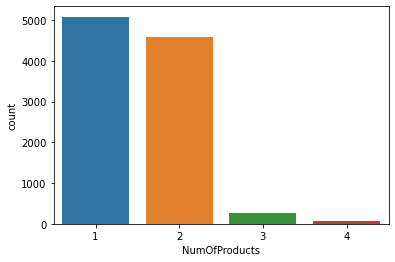

In [25]:
sns.countplot(x = "NumOfProducts", data = data)
plt.show()


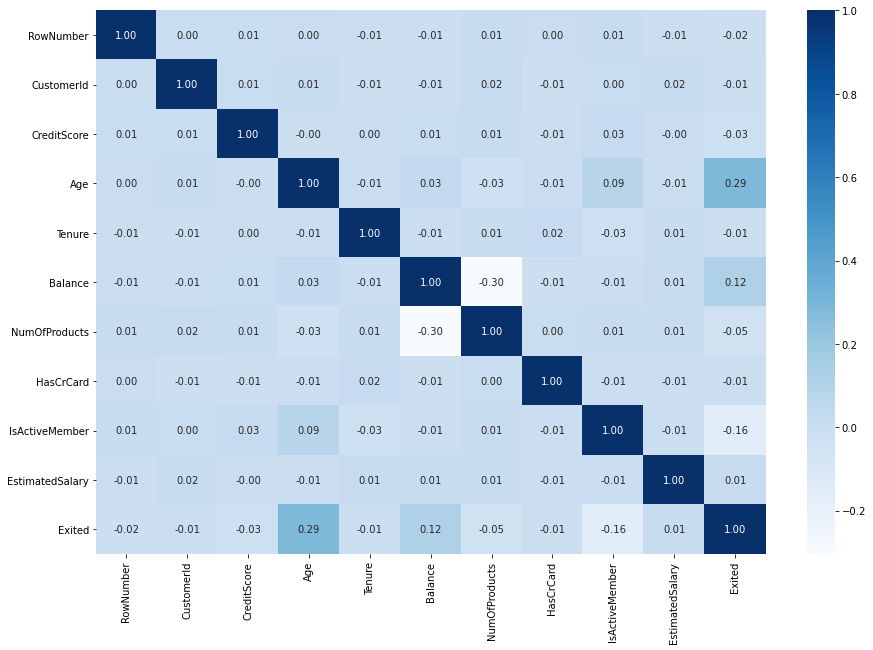

In [17]:
## heatmap helps to find the corretation between the attributes
fig, ax = plt.subplots(figsize=(15,10))   
sns.heatmap(data.corr(), annot = True , fmt=".2f",ax=ax ,cmap = "Blues")
plt.show()

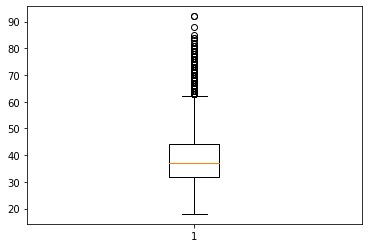

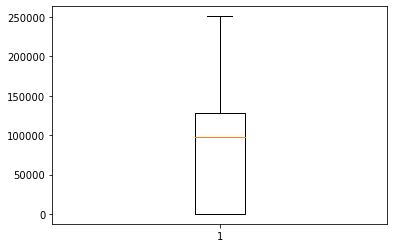

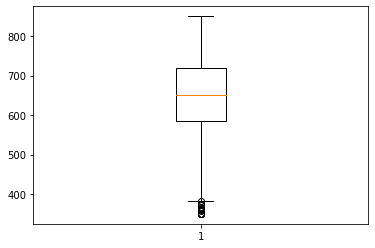

In [24]:
#boxplot helps to detect the outliers
plt.boxplot(data["Age"])
plt.show()

plt.boxplot(data["Balance"])
plt.show()

plt.boxplot(data["CreditScore"])
plt.show()


# Feature Engineering

In [26]:
##DUMMIFICATION OF CATAGORICAL COLUMNS
data = pd.get_dummies(data, columns= ["Geography"])
data = pd.get_dummies(data, columns= ["Gender"])
data = pd.get_dummies(data, columns= ["NumOfProducts"])
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,1,15634602,Hargrave,619,42,2,0.00,1,1,101348.88,1,1,0,0,1,0,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,0,1,112542.58,0,0,0,1,1,0,1,0,0,0
2,3,15619304,Onio,502,42,8,159660.80,1,0,113931.57,1,1,0,0,1,0,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,0,0,93826.63,0,1,0,0,1,0,0,1,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,79084.10,0,0,0,1,1,0,1,0,0,0


# Converting age into categorical age

In [27]:
print("Max age: ", data['Age'].max())
print("Min age: ", data['Age'].min())

Max age:  92
Min age:  18


In [28]:
age_cat = [0 if i < 38 else 1 if i <42  else 2 if i < 45 else 3 if i < 60 else 4 for i in data["Age"]]
data["Age_Cat"] = age_cat

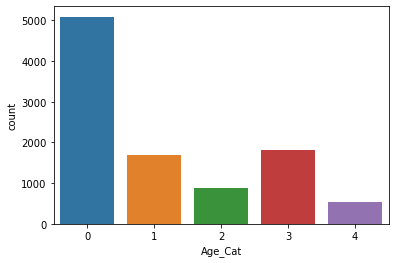

In [29]:
sns.countplot(x = "Age_Cat", data = data)
plt.show()

C:\Users\yasha\Downloads\anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


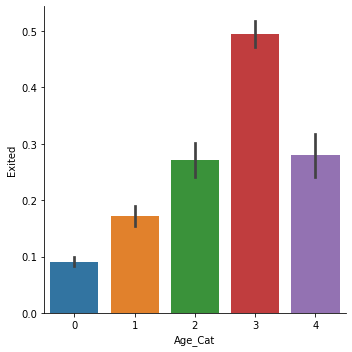

In [30]:
g = sns.factorplot(x = "Age_Cat", y = "Exited", data = data, kind = "bar")
g.set_ylabels("Exited")
plt.show()


In [31]:
data["Age_Cat"] = data["Age_Cat"].astype("category")
data = pd.get_dummies(data, columns=["Age_Cat"])
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,...,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Age_Cat_0,Age_Cat_1,Age_Cat_2,Age_Cat_3,Age_Cat_4
0,1,15634602,Hargrave,619,42,2,0.00,1,1,101348.88,...,0,1,0,0,0,0,0,1,0,0
1,2,15647311,Hill,608,41,1,83807.86,0,1,112542.58,...,0,1,0,0,0,0,1,0,0,0
2,3,15619304,Onio,502,42,8,159660.80,1,0,113931.57,...,0,0,0,1,0,0,0,1,0,0
3,4,15701354,Boni,699,39,1,0.00,0,0,93826.63,...,0,0,1,0,0,0,1,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,79084.10,...,0,1,0,0,0,0,0,1,0,0
5,6,15574012,Chu,645,44,8,113755.78,1,0,149756.71,...,1,0,1,0,0,0,0,1,0,0
6,7,15592531,Bartlett,822,50,7,0.00,1,1,10062.80,...,1,0,1,0,0,0,0,0,1,0
7,8,15656148,Obinna,376,29,4,115046.74,1,0,119346.88,...,0,0,0,0,1,1,0,0,0,0
8,9,15792365,He,501,44,4,142051.07,0,1,74940.50,...,1,0,1,0,0,0,0,1,0,0
9,10,15592389,H?,684,27,2,134603.88,1,1,71725.73,...,1,1,0,0,0,1,0,0,0,0


# converting creditscore to categorical creditscore 

In [32]:
print("Max age: ", data['CreditScore'].max())
print("Max age: ", data['CreditScore'].min())
print("Mean age: ", data['CreditScore'].mean())

Max age:  850
Max age:  350
Mean age:  650.5288


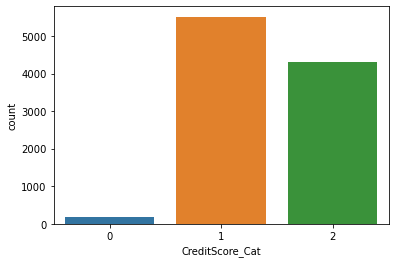

In [33]:
credit_cat = [0 if i < 450 else 1 if i <670  else 2 for i in data["CreditScore"]]
data["CreditScore_Cat"] = credit_cat
sns.countplot(x = "CreditScore_Cat", data = data)
plt.show()

In [34]:
data["CreditScore_Cat"] = data["CreditScore_Cat"].astype("category")
data = pd.get_dummies(data, columns=["CreditScore_Cat"])
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,...,NumOfProducts_3,NumOfProducts_4,Age_Cat_0,Age_Cat_1,Age_Cat_2,Age_Cat_3,Age_Cat_4,CreditScore_Cat_0,CreditScore_Cat_1,CreditScore_Cat_2
0,1,15634602,Hargrave,619,42,2,0.00,1,1,101348.88,...,0,0,0,0,1,0,0,0,1,0
1,2,15647311,Hill,608,41,1,83807.86,0,1,112542.58,...,0,0,0,1,0,0,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,1,0,113931.57,...,1,0,0,0,1,0,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,0,0,93826.63,...,0,0,0,1,0,0,0,0,0,1
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,79084.10,...,0,0,0,0,1,0,0,0,0,1
5,6,15574012,Chu,645,44,8,113755.78,1,0,149756.71,...,0,0,0,0,1,0,0,0,1,0
6,7,15592531,Bartlett,822,50,7,0.00,1,1,10062.80,...,0,0,0,0,0,1,0,0,0,1
7,8,15656148,Obinna,376,29,4,115046.74,1,0,119346.88,...,0,1,1,0,0,0,0,1,0,0
8,9,15792365,He,501,44,4,142051.07,0,1,74940.50,...,0,0,0,0,1,0,0,0,1,0
9,10,15592389,H?,684,27,2,134603.88,1,1,71725.73,...,0,0,1,0,0,0,0,0,0,1


Drop non-necessary row -> RowNumber, CustomerId

Drop object data type -> Surname

Drop no longer necessary row -> CreditScore, Age

In [35]:
data.drop(labels = ["RowNumber", "CustomerId","Surname","CreditScore","Age"], axis = 1, inplace = True) 
data.head()

,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,...,NumOfProducts_3,NumOfProducts_4,Age_Cat_0,Age_Cat_1,Age_Cat_2,Age_Cat_3,Age_Cat_4,CreditScore_Cat_0,CreditScore_Cat_1,CreditScore_Cat_2
0,2,0.00,1,1,101348.88,1,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,1,83807.86,0,1,112542.58,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
2,8,159660.80,1,0,113931.57,1,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
3,1,0.00,0,0,93826.63,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,2,125510.82,1,1,79084.10,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,1


Drop rows that have correlation value = 0.01 with Exited.

In [36]:
data.drop(labels = ["Tenure", "HasCrCard","EstimatedSalary"], axis = 1, inplace = True)
data.head()

,Balance,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Age_Cat_0,Age_Cat_1,Age_Cat_2,Age_Cat_3,Age_Cat_4,CreditScore_Cat_0,CreditScore_Cat_1,CreditScore_Cat_2
0,0.00,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
1,83807.86,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0
2,159660.80,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
3,0.00,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
4,125510.82,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1


# Modeling

In [37]:
##spliting the dataframe into x_data and y_data 
x_data = data.drop(["Exited"],axis=1)
y_data = data["Exited"].values


In [38]:
## spliting the data into test data and train data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size = 0.33,random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns.values)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns.values)

In [40]:
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (6700, 19)
x test:  (3300, 19)
y train:  (6700,)
y test:  (3300,)


# Building artificial neural networking model

In [105]:
import warnings
warnings.filterwarnings("ignore")

!pip install tensorflow
!pip install keras
import keras
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library

classifier=Sequential()
classifier.add(Dense(10, activation = 'relu' , input_dim = x_train.shape[1])),
classifier.add(Dense(8 , activation = 'relu')),
classifier.add(Dense(1 , activation = 'sigmoid'))


classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_history=classifier.fit(x_train, y_train,validation_split=0.33,epochs=100, batch_size=25, verbose=0) 


Epoch 1/100
268/268 [==============================] - 1s 2ms/step - loss: 0.3411 - accuracy: 0.8596
Epoch 2/100
268/268 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.8615
Epoch 3/100
268/268 [==============================] - 0s 1ms/step - loss: 0.3391 - accuracy: 0.8588
Epoch 4/100
268/268 [==============================] - 0s 1ms/step - loss: 0.3379 - accuracy: 0.8600
Epoch 5/100
268/268 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.8588
Epoch 6/100
268/268 [==============================] - 0s 1ms/step - loss: 0.3381 - accuracy: 0.8587
Epoch 7/100
268/268 [==============================] - 0s 1ms/step - loss: 0.3376 - accuracy: 0.8606
Epoch 8/100
268/268 [==============================] - 0s 1ms/step - loss: 0.3373 - accuracy: 0.8594
Epoch 9/100
268/268 [==============================] - 0s 1ms/step - loss: 0.3375 - accuracy: 0.8597
Epoch 10/100
268/268 [==============================] - 0s 1ms/step - loss: 0.3370 - accura

268/268 [==============================] - 0s 2ms/step - loss: 0.3349 - accuracy: 0.8612
Epoch 21/100
268/268 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8609
Epoch 22/100
268/268 [==============================] - 1s 2ms/step - loss: 0.3345 - accuracy: 0.8612
Epoch 23/100
268/268 [==============================] - 1s 2ms/step - loss: 0.3347 - accuracy: 0.8612
Epoch 24/100
268/268 [==============================] - 0s 1ms/step - loss: 0.3345 - accuracy: 0.8601
Epoch 25/100
268/268 [==============================] - 0s 1ms/step - loss: 0.3345 - accuracy: 0.8613
Epoch 26/100
268/268 [==============================] - 0s 1ms/step - loss: 0.3343 - accuracy: 0.8612
Epoch 27/100
268/268 [==============================] - 0s 1ms/step - loss: 0.3345 - accuracy: 0.8601
Epoch 28/100
268/268 [==============================] - 0s 1ms/step - loss: 0.3342 - accuracy: 0.8621
Epoch 29/100
268/268 [==============================] - 0s 1ms/step - loss: 0.3337 - accuracy: 

In [57]:
## Evaluate the performance of the model
score = classifier.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

104/104 [==============================] - 0s 683us/step - loss: 0.3319 - accuracy: 0.8648
Test loss: 0.3318672776222229
Test accuracy: 0.8648484945297241


In [71]:
# Predicting on train data
y_pred = classifier.predict(x_train)
score, acc = classifier.evaluate(x_train, y_train,batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc*100)

670/670 [==============================] - 1s 1ms/step - loss: 0.3275 - accuracy: 0.8633
Train score: 0.3275021016597748
Train accuracy: 86.32835745811462


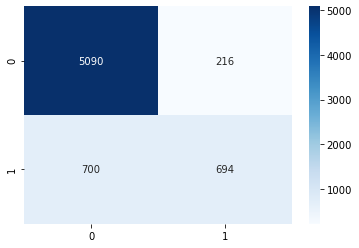

In [72]:
y_pred = (y_pred > 0.5)*1

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_train,y_pred)

sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap='Blues')
plt.show()


In [73]:
# Predicting on test data
y_pred = classifier.predict(x_test)
score, acc = classifier.evaluate(x_test, y_test,batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc*100)

330/330 [==============================] - 0s 1ms/step - loss: 0.3319 - accuracy: 0.8648
Test score: 0.33186718821525574
Test accuracy: 86.48484945297241


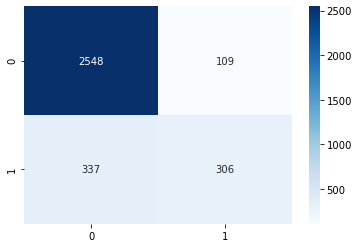

In [74]:
y_pred = (y_pred > 0.5)*1

cf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cf_matrix, annot=True, fmt='.0f', cmap='Blues')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


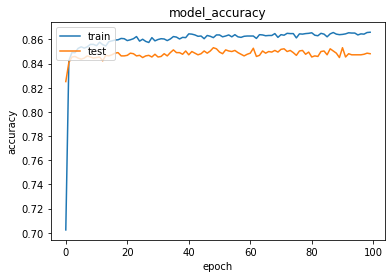

In [107]:
print(model_history.history.keys())

#summarize the history of accurarcy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [106]:
print(model_history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


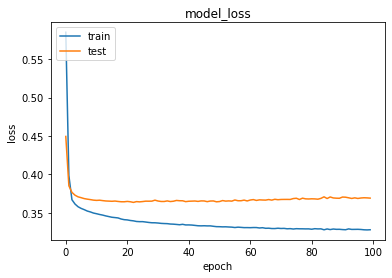

In [108]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()